In [ ]:
!pip install scikit-fuzzy

# Lógica Fuzzy

In [41]:
import numpy as np
import skfuzzy as fuzzy
import skfuzzy.control as control

<img src = "images/fuzzy.png">

* Grau de pertinência: o quanto um elemento 'x' pertence a um conjunto 'A'
* Variável: rótulo associado a uma variável linguística
* Conjunto de termos: nomes dados aos valores de cada variável
* Universo de duscurso: domínio em que cada variável é definida

<img src = "images/fluxograma.png">

## Problema da gorjeta
<img src = "images/regras_gorjeta.png">

#### Criando antescedente (entrada/input)

In [42]:
# Definindo universo de discurso e nome da variável
universo = np.arange(0, 11)

qualidade = control.Antecedent(universe = universo, label = "qualidade")
servico = control.Antecedent(universe = universo, label = "servico")

# Criando função de pertinência triangular -> trimf, trapezoidal -> trapmf
qualidade["ruim"] = fuzzy.trapmf(qualidade.universe, [0, 0, 2, 5])
qualidade["bom"] = fuzzy.trimf(qualidade.universe, [3, 5, 7])
qualidade["excelente"] = fuzzy.trapmf(qualidade.universe, [5, 8, 10, 10])

servico["ruim"] = fuzzy.trapmf(servico.universe, [0, 0, 2, 5])
servico["bom"] = fuzzy.trimf(servico.universe, [3, 5, 7])
servico["excelente"] = fuzzy.trapmf(servico.universe, [5, 8, 10, 10])


C:\Users\mpere\AppData\Local\Programs\Python\Python37\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\mpere\AppData\Local\Programs\Python\Python37\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


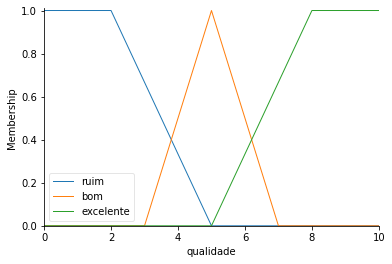

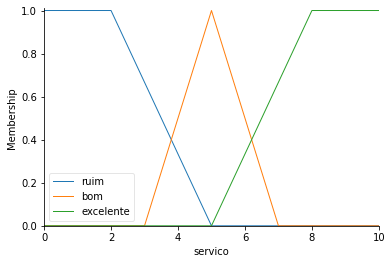

In [43]:
qualidade.view()
servico.view()

#### Criando consequent (saída/output)

C:\Users\mpere\AppData\Local\Programs\Python\Python37\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


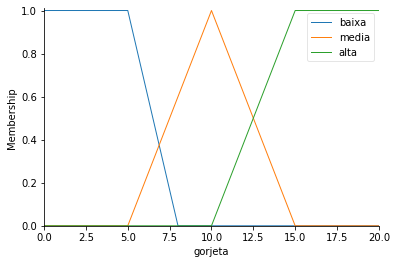

In [44]:
# Universo da gorjeta
universo_gorjeta = np.arange(0, 21)

gorjeta = control.Consequent(universe = universo_gorjeta, label = "gorjeta")

gorjeta["baixa"] = fuzzy.trapmf(gorjeta.universe, [0, 0, 5, 8])
gorjeta["media"] = fuzzy.trimf(gorjeta.universe, [5, 10, 15])
gorjeta["alta"] = fuzzy.trapmf(gorjeta.universe, [10, 15, 20, 20])

gorjeta.view()

#### Criando regras
* SERVICO = ruim ou QUALIDADE = ruim -> GORJETA = baixa
* SERVICO = bom -> GORJETA = media
* SERVICO = excelente ou QUALIDADE = excelente -> GORJETA = alta

In [58]:
# REGRA -> expressão X, resultado Y

regra1 = control.Rule(servico["ruim"] | qualidade["ruim"], gorjeta["baixa"])
regra2 = control.Rule(servico["bom"], gorjeta["media"])
regra3 = control.Rule(servico["excelente"] | qualidade["excelente"], gorjeta["alta"])

#### Criando sistema

In [59]:
# Adicionando regras ao controle
gorjeta_controle = control.ControlSystem([regra1, regra2, regra3])

# Criando sistema com o controle de gorjeta
sistema = control.ControlSystemSimulation(gorjeta_controle)

Resultado 'desfuzzificado': 6.888077858880778


C:\Users\mpere\AppData\Local\Programs\Python\Python37\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


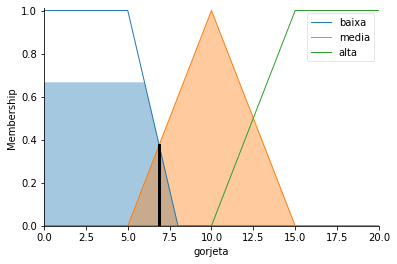

In [65]:
sistema.input["qualidade"] = 3
sistema.input["servico"] = 5

# Executando o sistema
sistema.compute()

print(f"Resultado 'desfuzzificado': {sistema.output['gorjeta']}")

gorjeta.view(sim = sistema)